<a href="https://colab.research.google.com/github/Jovania/Projetos-01/blob/master/Vgg16_bn20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Obtendo o dataset

In [1]:
!wget https://www.dropbox.com/s/ka0bbhrdp5k2nzo/cassava-leaf-disease-classification.zip?dl=0
!unzip -qq -n cassava-leaf-disease-classification.zip?dl=0

--2020-12-21 17:44:20--  https://www.dropbox.com/s/ka0bbhrdp5k2nzo/cassava-leaf-disease-classification.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/ka0bbhrdp5k2nzo/cassava-leaf-disease-classification.zip [following]
--2020-12-21 17:44:20--  https://www.dropbox.com/s/raw/ka0bbhrdp5k2nzo/cassava-leaf-disease-classification.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucdabf6e6f6d73323e5298edc355.dl.dropboxusercontent.com/cd/0/inline/BFizQdednF8dcZeZjmJGs4u7d9g554D0MEXYQfMQbdkztpt0vMM3cX0cJa_6TYyMHsrDBN8tjHnpdhaW5fmyiQTmnZ9R_YGqEzQPTHL7yt-e0qeywy-T8FfK71b_wemcga4/file# [following]
--2020-12-21 17:44:20--  https://ucdabf6e6f6d73323e5298edc355.dl.dropboxusercontent.com/cd/0/inline/BFizQdednF8dcZeZjmJGs4u7d

In [2]:
import pandas as pd

df_train = pd.read_csv("train.csv")
df_train.head()

,image_id,label
0,1000015157.jpg,0
1,1000201771.jpg,3
2,100042118.jpg,1
3,1000723321.jpg,1
4,1000812911.jpg,3


In [3]:
df_train["disease"] = df_train.label.map({0:"Cassava Bacterial Blight (CBB)",
1:"Cassava Brown Streak Disease (CBSD)",
2:"Cassava Green Mottle (CGM)",
3:"Cassava Mosaic Disease (CMD)",
4:"Healthy"})

df_train.head()

,image_id,label,disease
0,1000015157.jpg,0,Cassava Bacterial Blight (CBB)
1,1000201771.jpg,3,Cassava Mosaic Disease (CMD)
2,100042118.jpg,1,Cassava Brown Streak Disease (CBSD)
3,1000723321.jpg,1,Cassava Brown Streak Disease (CBSD)
4,1000812911.jpg,3,Cassava Mosaic Disease (CMD)


In [4]:
#df_train = df_train[:100]

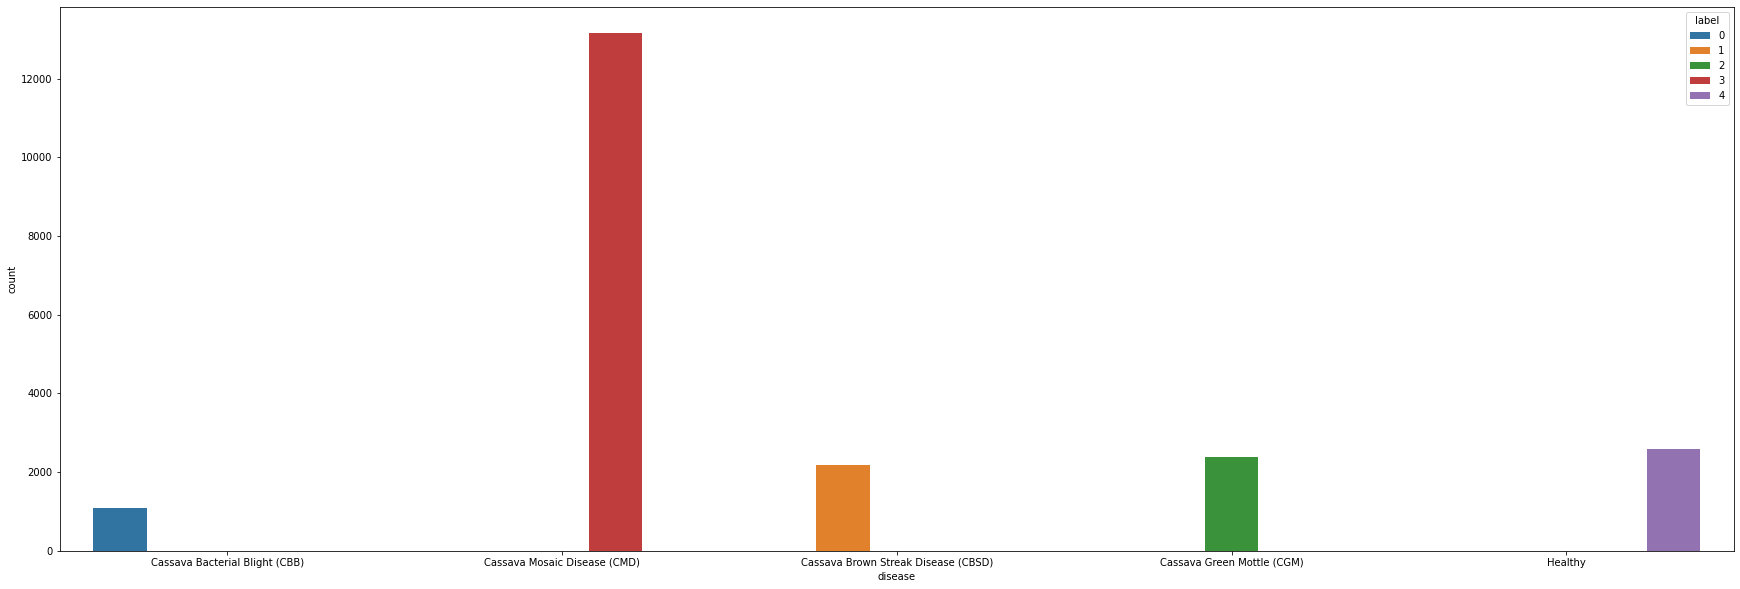

In [5]:
import os
import cv2
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib import rcParams


rcParams["figure.figsize"] = 30,10
sns.countplot(data = df_train,x="disease",hue="label")

# Instalando fastai

In [6]:
! [ -e /content ] && pip install -Uqq fastai --upgrade

     |████████████████████████████████| 194kB 7.7MB/s 
     |████████████████████████████████| 61kB 7.7MB/s 


In [7]:
from fastai.vision.all import *
from fastai.callback.tracker import SaveModelCallback

# Carregando o dataset e redimensionando

In [8]:
dls = ImageDataLoaders.from_df(df_train, path="./train_images/", item_tfms=Resize(224))


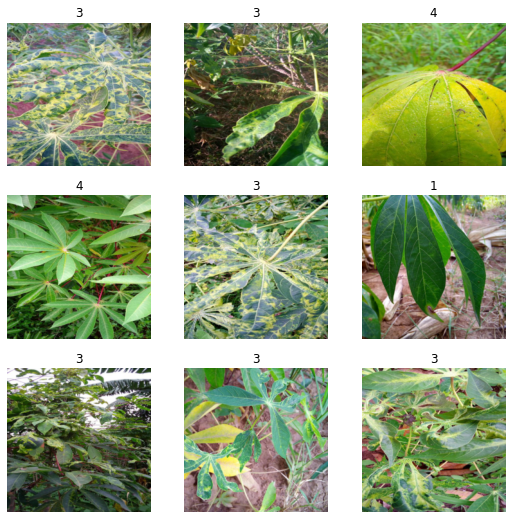

In [9]:
dls.show_batch()

# Treinando um modelo
ajuda do código da Gisele Moraes (disponibilizado no forum da disciplina)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.172729,1.204019,0.357326,0.642673,05:49
1,0.959550,0.876165,0.315027,0.684973,05:46
2,0.843046,1.456509,0.595934,0.404066,05:46
3,0.746467,1.080775,0.398691,0.601309,05:46
4,0.661304,0.854165,0.307782,0.692218,05:47
5,0.605204,0.882851,0.321337,0.678663,05:47
6,0.613574,0.813842,0.261276,0.738724,05:47
7,0.565245,0.801964,0.311755,0.688245,05:47
8,0.551285,0.495819,0.171535,0.828465,05:47
9,0.516654,0.482665,0.167095,0.832905,05:47


Better model found at epoch 0 with valid_loss value: 1.2040189504623413.
Better model found at epoch 1 with valid_loss value: 0.8761646747589111.
Better model found at epoch 4 with valid_loss value: 0.854165256023407.
Better model found at epoch 6 with valid_loss value: 0.813841700553894.
Better model found at epoch 7 with valid_loss value: 0.8019640445709229.
Better model found at epoch 8 with valid_loss value: 0.4958193004131317.
Better model found at epoch 9 with valid_loss value: 0.482665091753006.
Better model found at epoch 12 with valid_loss value: 0.48250335454940796.


Path('train_images/models/last_model.pth')

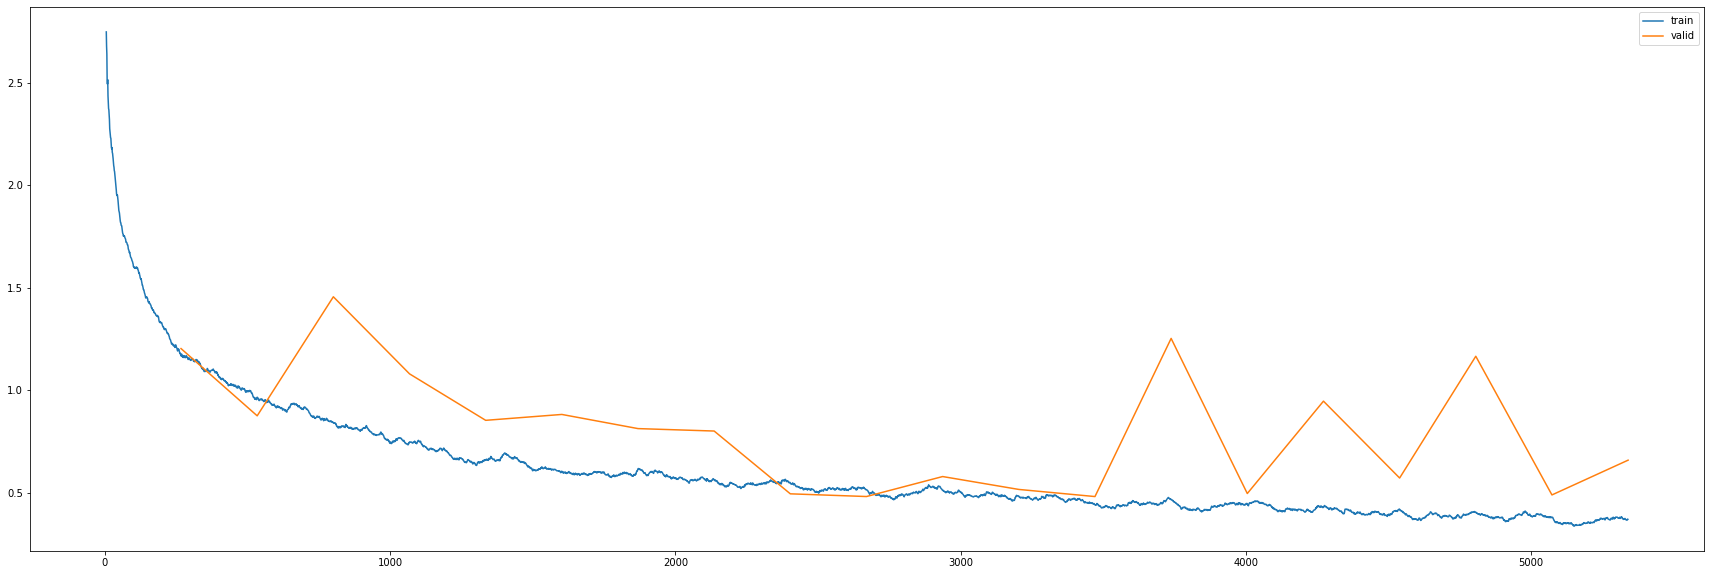

In [10]:
# cria modelo e uma callback para verificar e salvar o melhor modelo após cada época
learn = cnn_learner(dls, vgg16_bn, metrics=[error_rate,accuracy], pretrained=False)
save_callback = SaveModelCallback(fname='best_model', with_opt=True, monitor='valid_loss', reset_on_fit=False) 
# o parâmetro monitor informa como se deve se verificar se um modelo é melhor que outro
# valid_loss - para menor loss no cjto de validação
#train_loss - para menor loss no cjto de treino

#--------
# treinamento, verificando se obteve um melhor modelo a cada época e salvando caso for um melhor modelo como best_model
nr_epochs = 20
learn.fit(nr_epochs, cbs=save_callback)

#--------
# plota um gráfico de loss
learn.recorder.plot_loss()

#--------
# salva os ultimos pesos (não necessariamente o melhor)
learn.save('last_model')

In [11]:
from google.colab import drive

# Autorização
drive.mount('/content/drive')

import os
os.chdir('/content/drive/My Drive/pesos/')

%ls

Mounted at /content/drive
'cassava-leaf-disease-classification.zip?dl=0'   test_tfrecords/
 label_num_to_disease_map.json                   train.csv
 sample_submission.csv                           train_images/
 test_images/                                    train_tfrecords/


In [12]:
os.chdir('/content/drive/My Drive/pesos/')

In [13]:
#learn.export()